No handles with labels found to put in legend.


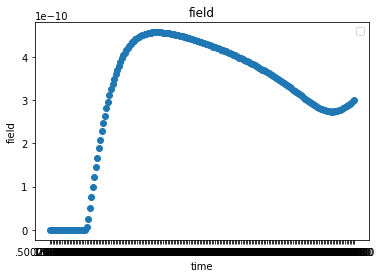

In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

x = []
y = []

with open('../Run_1/20km/fields2_100.csv','r') as csvfile:
	plots = csv.reader(csvfile, delimiter = ',')
	#csvreader is usually used to read text, for numbers use pandas
	
	for row in plots:
		x.append(row[0])
		y.append(float(row[2]))

plt.scatter(x, y)
plt.xlabel('time')
plt.ylabel('field')
plt.title('field')
plt.legend()
plt.show()


In [2]:
import pandas as pd

file1=pd.read_csv('../alf2d/Fields_240809/fields2_900.csv',header=None)

print(file1.head()) #head printes only the fiest five lines
#pandas normally reads the fist row as header, hence header=none

      0    1    2    3    4
0  0.05  0.0  0.0  0.0  0.0
1  0.10  0.0  0.0  0.0  0.0
2  0.15  0.0  0.0  0.0  0.0
3  0.20  0.0  0.0  0.0  0.0
4  0.25  0.0  0.0  0.0  0.0


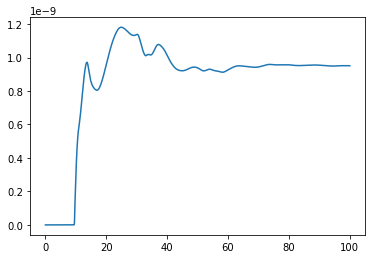

In [3]:
#print(file1.columns)
plot1=plt.plot(file1[0],file1[2])
plt.savefig('test1.png')

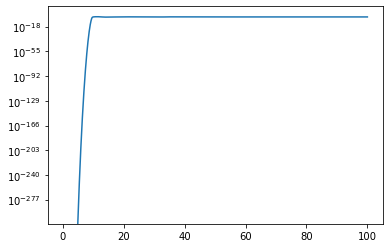

In [4]:
plot2=plt.semilogy(file1[0],file1[1])

In [5]:
file1.describe()

,0,1,2,3,4
count,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03
mean,50.025000,0.000365,8.661726e-10,-1.790875e-10,-4.177839e-12
std,28.874729,0.000137,3.015227e-10,6.318725e-11,1.488458e-12
min,0.050000,0.000000,0.000000e+00,-2.440290e-10,-8.993970e-12
25%,25.037500,0.000375,9.225030e-10,-1.987090e-10,-4.638815e-12
50%,50.025000,0.000390,9.501315e-10,-1.969815e-10,-4.540315e-12
75%,75.012500,0.000399,9.569770e-10,-1.914220e-10,-4.418667e-12
max,100.000000,0.000815,1.181100e-09,3.357670e-11,5.660450e-12


In [6]:
for i in range(1,10):
    j=i*100
    fname='../Run_1/20km/Fields_240809/fields2_'+str(j)+'.csv'
    file1=pd.read_csv(fname,header=None)
    print(fname)

../Run_1/20km/Fields_240809/fields2_100.csv
../Run_1/20km/Fields_240809/fields2_200.csv
../Run_1/20km/Fields_240809/fields2_300.csv
../Run_1/20km/Fields_240809/fields2_400.csv
../Run_1/20km/Fields_240809/fields2_500.csv
../Run_1/20km/Fields_240809/fields2_600.csv
../Run_1/20km/Fields_240809/fields2_700.csv
../Run_1/20km/Fields_240809/fields2_800.csv
../Run_1/20km/Fields_240809/fields2_900.csv


In [7]:
from scipy.fft import fft, ifft
import numpy as np

C:\Users\Khilav\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


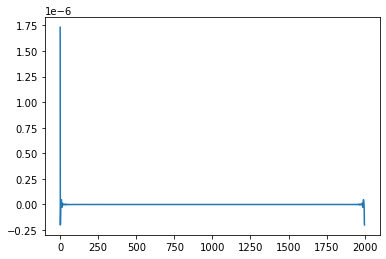

In [8]:
x=np.array(file1[2])
y=fft(x)
plt.plot(y)

In [9]:
print(y.shape)

(2000,)


In [10]:
print(file1[2].shape)

(2000,)


In [11]:
x1=np.fft.fft(file1[2])
print(x1)
print(y)

[ 1.73234529e-06+0.00000000e+00j -2.00121837e-07+2.53269123e-08j
 -1.87955033e-07+1.54429391e-07j ... -5.50630567e-08-1.67805467e-07j
 -1.87955033e-07-1.54429391e-07j -2.00121837e-07-2.53269123e-08j]
[ 1.73234529e-06-0.00000000e+00j -2.00121837e-07+2.53269123e-08j
 -1.87955033e-07+1.54429391e-07j ... -5.50630567e-08-1.67805467e-07j
 -1.87955033e-07-1.54429391e-07j -2.00121837e-07-2.53269123e-08j]


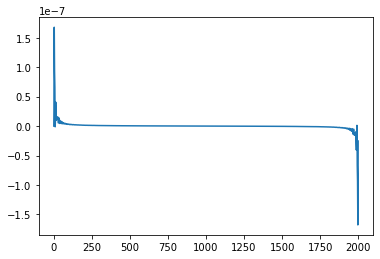

In [12]:
plt.plot(x1.imag)

In [13]:
np.absolute(x1)

array([1.73234529e-06, 2.01718125e-07, 2.43260213e-07, ...,
       1.76608650e-07, 2.43260213e-07, 2.01718125e-07])

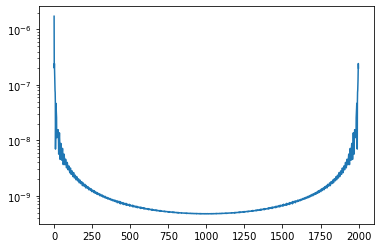

In [14]:
plt.semilogy(np.absolute(x1))

In [15]:
np.set_printoptions(threshold=np.inf)
print(x1)

[ 1.73234529e-06+0.00000000e+00j -2.00121837e-07+2.53269123e-08j
 -1.87955033e-07+1.54429391e-07j -5.50630567e-08+1.67805467e-07j
 -1.00131316e-08+1.20977215e-07j  3.66020429e-09+9.34303706e-08j
  1.32766288e-08+7.85359663e-08j  3.12084437e-08+6.62359306e-08j
  4.69525243e-08+1.95665436e-08j  6.86513362e-09-1.22939286e-09j
 -9.93737997e-09+4.65640993e-09j -2.40181147e-08+1.06439840e-08j
 -2.78729204e-08+3.73628683e-08j -5.17170134e-09+4.06119429e-08j
  2.02942506e-09+3.35871932e-08j  6.10221404e-09+2.93901223e-08j
  1.25661410e-08+2.23028695e-08j  6.34431728e-09+9.96497986e-09j
  1.99242534e-10+1.11735915e-08j -1.20802952e-09+1.19759558e-08j
 -2.19962473e-09+1.17212921e-08j -4.42874278e-09+1.21727371e-08j
 -3.56514113e-09+1.48429897e-08j -2.25243187e-09+1.43438151e-08j
 -2.18496866e-09+1.39818835e-08j -2.16621778e-09+1.49318502e-08j
  1.07976035e-09+1.55458780e-08j  2.39590270e-09+1.28057152e-08j
  2.59293926e-09+1.11854745e-08j  3.19832904e-09+9.28253912e-09j
  2.04868753e-09+5.271587

In [73]:
x1=np.fft.fft(file1[1])
n=x1.size
timestep=1.0E-3
freq=np.fft.fftfreq(n,d=timestep)

#x1=np.fft.fftshift(x1)
#freq=np.fft.fftshift(freq)
p=freq>=0

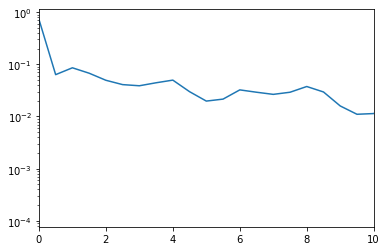

In [75]:
plt.xlim([0,10])
plot3=plt.semilogy(freq[p],np.absolute(x1[p]))
plt.show()